In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, SubsetRandomSampler
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Define a simple neural network
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.flatten = nn.Flatten()
        self.linear1 = nn.ReLU()
        self.linear1 = nn.Linear(28 * 28, 10)  # 10 output classes for digits 0-9

    def forward(self, x):
        x = self.flatten(x)
        x = self.linear1(x)
        return x

# Load MNIST dataset
transform = transforms.ToTensor()
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, download=True, transform=transform)

In [3]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)

In [29]:

model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 1200),
            nn.ReLU(),
            nn.Linear(1200,1200),
            nn.ReLU(),
            nn.Linear(1200,10),
        )

In [30]:
# Initialize the model, loss function, and optimizer
# model = SimpleNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [32]:
# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_loader)}], Loss: {loss.item():.4f}')

print('Finished Training')

Epoch [1/5], Step [100/938], Loss: 0.3126
Epoch [1/5], Step [200/938], Loss: 0.4597
Epoch [1/5], Step [300/938], Loss: 0.4957
Epoch [1/5], Step [400/938], Loss: 0.3004
Epoch [1/5], Step [500/938], Loss: 0.3735
Epoch [1/5], Step [600/938], Loss: 0.4512
Epoch [1/5], Step [700/938], Loss: 0.2865
Epoch [1/5], Step [800/938], Loss: 0.3891
Epoch [1/5], Step [900/938], Loss: 0.2709
Epoch [2/5], Step [100/938], Loss: 0.1778
Epoch [2/5], Step [200/938], Loss: 0.3253
Epoch [2/5], Step [300/938], Loss: 0.4749
Epoch [2/5], Step [400/938], Loss: 0.2666
Epoch [2/5], Step [500/938], Loss: 0.3797
Epoch [2/5], Step [600/938], Loss: 0.2509
Epoch [2/5], Step [700/938], Loss: 0.4050
Epoch [2/5], Step [800/938], Loss: 0.4533
Epoch [2/5], Step [900/938], Loss: 0.1629
Epoch [3/5], Step [100/938], Loss: 0.3291
Epoch [3/5], Step [200/938], Loss: 0.2230
Epoch [3/5], Step [300/938], Loss: 0.2499
Epoch [3/5], Step [400/938], Loss: 0.3135
Epoch [3/5], Step [500/938], Loss: 0.2543
Epoch [3/5], Step [600/938], Loss:

In [33]:
model.eval()

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=1200, bias=True)
  (2): ReLU()
  (3): Linear(in_features=1200, out_features=1200, bias=True)
  (4): ReLU()
  (5): Linear(in_features=1200, out_features=10, bias=True)
)

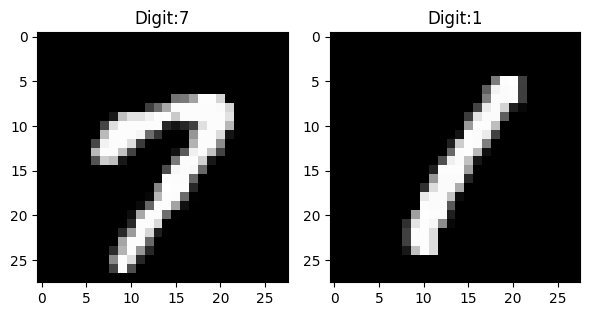

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(6, 6))
for i, id in enumerate([15, 3]):
    axes[i].imshow(train_dataset[id][0].squeeze(), cmap='gray')
    axes[i].set_title('Digit:' + str(train_dataset[id][1]))
plt.tight_layout()
plt.show()

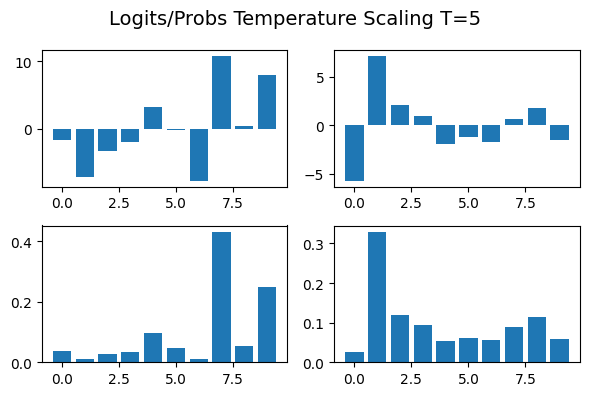

In [54]:
temperature = 5
fig, axes = plt.subplots(2, 2, figsize=(6, 4))
for i, id in enumerate([15, 3]):
    logits = model(train_dataset[id][0])
    probabilities = torch.softmax(logits/temperature, dim=1)
    logits = logits.squeeze().detach().numpy()
    axes[0][i].bar(np.arange(10), logits)
    axes[1][i].bar(np.arange(10), probabilities.squeeze().detach().numpy())
fig.suptitle("Logits/Probs Temperature Scaling T=5", fontsize=14)
fig.tight_layout()
plt.show()

In [22]:
logits.squeeze().detach().numpy()

array([ 6.948657  , -3.7133117 , -0.6259227 ,  0.01977873, -3.2357323 ,
        2.5548298 , -0.32909453, -0.6316612 , -0.3133288 , -0.9772506 ],
      dtype=float32)

Epoch [1/2], Step [100/194], Loss: 0.1968
Epoch [2/2], Step [100/194], Loss: 0.1360
Finished Training


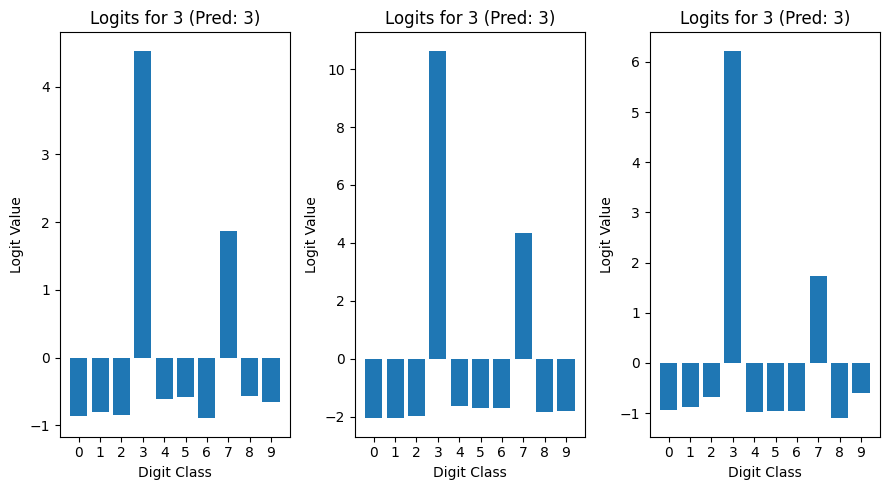

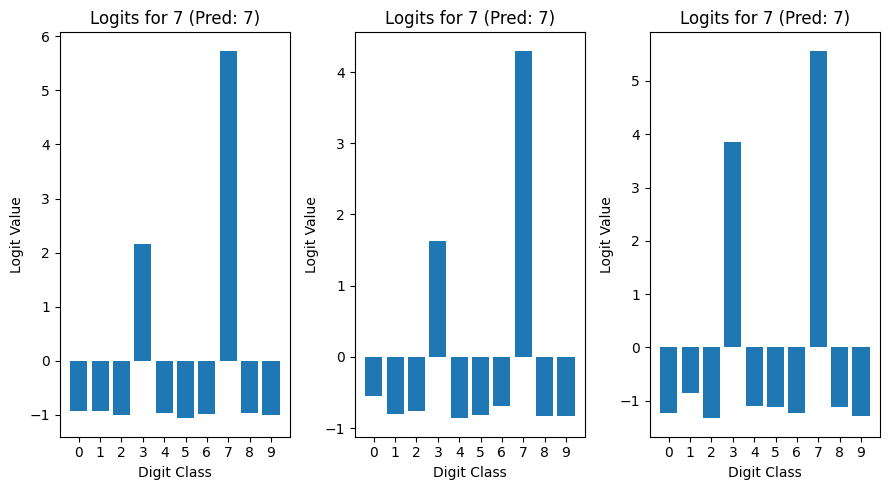

In [ ]:



# --- Efficiently Sample 3 images of digit 3 ---
indices_of_3_train = (train_dataset.targets == 3).nonzero(as_tuple=True)[0]
num_samples_3 = min(3, len(indices_of_3_train))
sampled_indices_3_train = indices_of_3_train[torch.randperm(len(indices_of_3_train))[:num_samples_3]]
sampler_3_train = SubsetRandomSampler(sampled_indices_3_train)
dataloader_3_train_sample = DataLoader(train_dataset, batch_size=1, sampler=sampler_3_train)

indices_of_7_train = (train_dataset.targets == 7).nonzero(as_tuple=True)[0]
num_samples_7 = min(3, len(indices_of_7_train))
sampled_indices_7_train = indices_of_7_train[torch.randperm(len(indices_of_7_train))[:num_samples_7]]
sampler_7_train = SubsetRandomSampler(sampled_indices_7_train)
dataloader_7_train_sample = DataLoader(train_dataset, batch_size=1, sampler=sampler_7_train)

# --- Create DataLoaders for training on ALL 3s and 7s ---
train_indices_3 = (train_dataset.targets == 3).nonzero(as_tuple=True)[0]
train_indices_7 = (train_dataset.targets == 7).nonzero(as_tuple=True)[0]
train_indices = torch.cat((train_indices_3, train_indices_7))
train_subset = torch.utils.data.Subset(train_dataset, train_indices)
train_loader = DataLoader(train_subset, batch_size=64, shuffle=True)





# --- Get logits and plot for the sampled 3 images ---
model.eval()
with torch.no_grad():
    fig_3, axes_3 = plt.subplots(1, num_samples_3, figsize=(3 * num_samples_3, 5))
    for i, (image, _) in enumerate(dataloader_3_train_sample):
        logits_3 = model(image)
        probabilities_3 = torch.softmax(logits_3, dim=1)
        predicted_class_3 = torch.argmax(probabilities_3, dim=1).item()
        logit_values_3 = logits_3.squeeze().numpy()

        if num_samples_3 == 1:
            ax = axes_3
        else:
            ax = axes_3[i]
        ax.bar(np.arange(10), logit_values_3)
        ax.set_title(f'Logits for 3 (Pred: {predicted_class_3})')
        ax.set_xlabel('Digit Class')
        ax.set_ylabel('Logit Value')
        ax.set_xticks(np.arange(10))
    fig_3.tight_layout()
    plt.show()

    # --- Get logits and plot for the sampled 7 images ---
    fig_7, axes_7 = plt.subplots(1, num_samples_7, figsize=(3 * num_samples_7, 5))
    for i, (image, _) in enumerate(dataloader_7_train_sample):
        logits_7 = model(image)
        probabilities_7 = torch.softmax(logits_7, dim=1)
        predicted_class_7 = torch.argmax(probabilities_7, dim=1).item()
        logit_values_7 = logits_7.squeeze().numpy()

        if num_samples_7 == 1:
            ax = axes_7
        else:
            ax = axes_7[i]
        ax.bar(np.arange(10), logit_values_7)
        ax.set_title(f'Logits for 7 (Pred: {predicted_class_7})')
        ax.set_xlabel('Digit Class')
        ax.set_ylabel('Logit Value')
        ax.set_xticks(np.arange(10))
    fig_7.tight_layout()
    plt.show()